In [1]:
library(stringr)
library(data.table)
library(Logolas)
library(ggplot2)
library(seqinr)

In [3]:
d=fread("gunzip -cq ../../../calpain_cleavage_prediction//cosmoss_V3.3.release.pep.ccd.full.txt.gz",sep="\t",header=FALSE)
names(d)=c("cgi","aa","pos","score","cutoff","type","p1","p2")
d=data.table(geneid=str_replace(d$cgi,"V3\\.\\d+$",".mRNA"),var=as.numeric(str_match(d$cgi,"V3\\.(\\d+)$")[,2]),d)
setkey(d,"geneid")
head(d)

geneid,var,cgi,aa,pos,score,cutoff,type,p1,p2
<chr>,<dbl>,<chr>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Pp3c10_10040.mRNA,4,Pp3c10_10040V3.4,472,2,0.677,0.654,primary_acetylated,********ME,SFAT
Pp3c10_10040.mRNA,4,Pp3c10_10040V3.4,472,4,0.709,0.654,primary_acetylated,******MESF,ATPY
Pp3c10_10040.mRNA,4,Pp3c10_10040V3.4,472,5,0.755,0.654,primary_acetylated,*****MESFA,TPYP
Pp3c10_10040.mRNA,4,Pp3c10_10040V3.4,472,39,1.082,0.654,primary_acetylated,LSFKRFQALM,SQKT
Pp3c10_10040.mRNA,4,Pp3c10_10040V3.4,472,106,0.777,0.654,none,SIKKSKKERK,GTRK
Pp3c10_10040.mRNA,4,Pp3c10_10040V3.4,472,107,0.894,0.654,primary_acetylated,IKKSKKERKG,TRKR


In [4]:
table(d$type)


                           none              primary_acetylated 
                         200621                         1315800 
                  secondary_ATE             secondary_peptidase 
                          91036                          521650 
            tertiary_deaminated tertiary_oxidized_or_acetylated 
                         182318                            6384 

In [5]:
d[order(var,decreasing=FALSE), rank := frank(-aa),by = list(geneid)]

In [6]:
head(d)

geneid,var,cgi,aa,pos,score,cutoff,type,p1,p2,rank
<chr>,<dbl>,<chr>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
Pp3c10_10040.mRNA,4,Pp3c10_10040V3.4,472,2,0.677,0.654,primary_acetylated,********ME,SFAT,126.5
Pp3c10_10040.mRNA,4,Pp3c10_10040V3.4,472,4,0.709,0.654,primary_acetylated,******MESF,ATPY,126.5
Pp3c10_10040.mRNA,4,Pp3c10_10040V3.4,472,5,0.755,0.654,primary_acetylated,*****MESFA,TPYP,126.5
Pp3c10_10040.mRNA,4,Pp3c10_10040V3.4,472,39,1.082,0.654,primary_acetylated,LSFKRFQALM,SQKT,126.5
Pp3c10_10040.mRNA,4,Pp3c10_10040V3.4,472,106,0.777,0.654,none,SIKKSKKERK,GTRK,126.5
Pp3c10_10040.mRNA,4,Pp3c10_10040V3.4,472,107,0.894,0.654,primary_acetylated,IKKSKKERKG,TRKR,126.5


In [7]:
D=unique(d[order(geneid,rank,var,pos),c(1:4,11)])
D[,urank:=1:.N,by=geneid]
head(D)

geneid,var,cgi,aa,rank,urank
<chr>,<dbl>,<chr>,<int>,<dbl>,<int>
Pp3c10_10040.mRNA,3,Pp3c10_10040V3.3,472,126.5,1
Pp3c10_10040.mRNA,4,Pp3c10_10040V3.4,472,126.5,2
Pp3c10_10040.mRNA,5,Pp3c10_10040V3.5,472,126.5,3
Pp3c10_10040.mRNA,6,Pp3c10_10040V3.6,472,126.5,4
Pp3c10_10040.mRNA,1,Pp3c10_10040V3.1,452,316.5,5
Pp3c10_10040.mRNA,2,Pp3c10_10040V3.2,452,316.5,6


In [8]:
nrow(d)
nrow(D)
d=merge(d,D,by=c("geneid","var","cgi","aa","rank"))
nrow(d)

[1] 2317809

[1] 85828

[1] 2317809

In [9]:
head(d)

geneid,var,cgi,aa,rank,pos,score,cutoff,type,p1,p2,urank
<chr>,<dbl>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>
Pp3c10_10040.mRNA,1,Pp3c10_10040V3.1,452,316.5,2,0.677,0.654,primary_acetylated,********ME,SFAT,5
Pp3c10_10040.mRNA,1,Pp3c10_10040V3.1,452,316.5,4,0.709,0.654,primary_acetylated,******MESF,ATPY,5
Pp3c10_10040.mRNA,1,Pp3c10_10040V3.1,452,316.5,5,0.755,0.654,primary_acetylated,*****MESFA,TPYP,5
Pp3c10_10040.mRNA,1,Pp3c10_10040V3.1,452,316.5,39,1.082,0.654,primary_acetylated,LSFKRFQALM,SQKT,5
Pp3c10_10040.mRNA,1,Pp3c10_10040V3.1,452,316.5,106,0.777,0.654,none,SIKKSKKERK,GTRK,5
Pp3c10_10040.mRNA,1,Pp3c10_10040V3.1,452,316.5,107,0.894,0.654,primary_acetylated,IKKSKKERKG,TRKR,5


Selecting for each gene from the longest protein isoform. Ties in protein length were decided by the index of the splice variant.

In [10]:
D=d[urank==1,]
nrow(D)
head(D)

[1] 743027

geneid,var,cgi,aa,rank,pos,score,cutoff,type,p1,p2,urank
<chr>,<dbl>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>
Pp3c10_10040.mRNA,3,Pp3c10_10040V3.3,472,126.5,2,0.677,0.654,primary_acetylated,********ME,SFAT,1
Pp3c10_10040.mRNA,3,Pp3c10_10040V3.3,472,126.5,4,0.709,0.654,primary_acetylated,******MESF,ATPY,1
Pp3c10_10040.mRNA,3,Pp3c10_10040V3.3,472,126.5,5,0.755,0.654,primary_acetylated,*****MESFA,TPYP,1
Pp3c10_10040.mRNA,3,Pp3c10_10040V3.3,472,126.5,39,1.082,0.654,primary_acetylated,LSFKRFQALM,SQKT,1
Pp3c10_10040.mRNA,3,Pp3c10_10040V3.3,472,126.5,106,0.777,0.654,none,SIKKSKKERK,GTRK,1
Pp3c10_10040.mRNA,3,Pp3c10_10040V3.3,472,126.5,107,0.894,0.654,primary_acetylated,IKKSKKERKG,TRKR,1


In [11]:
table(D$type)


                           none              primary_acetylated 
                          68808                          418772 
                  secondary_ATE             secondary_peptidase 
                          28514                          167430 
            tertiary_deaminated tertiary_oxidized_or_acetylated 
                          57371                            2132 

In [12]:
DD=data.frame(do.call(rbind,lapply(seq_len(nrow(D)),function(i) unlist(strsplit(as.character(paste0(D[i,"p1"],D[i,"p2"])),split=NULL)))))

In [75]:
names(DD)=gsub("X","P",names(DD))
D=cbind(D,DD)
D=as.data.table(D)
setkey(D,"geneid")
head(D)

geneid,var,cgi,aa,rank,pos,score,cutoff,type,p1,⋯,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14
<chr>,<dbl>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
Pp3c10_10040.mRNA,3,Pp3c10_10040V3.3,472,126.5,2,0.677,0.654,primary_acetylated,********ME,⋯,*,*,*,*,M,E,S,F,A,T
Pp3c10_10040.mRNA,3,Pp3c10_10040V3.3,472,126.5,4,0.709,0.654,primary_acetylated,******MESF,⋯,*,*,M,E,S,F,A,T,P,Y
Pp3c10_10040.mRNA,3,Pp3c10_10040V3.3,472,126.5,5,0.755,0.654,primary_acetylated,*****MESFA,⋯,*,M,E,S,F,A,T,P,Y,P
Pp3c10_10040.mRNA,3,Pp3c10_10040V3.3,472,126.5,39,1.082,0.654,primary_acetylated,LSFKRFQALM,⋯,R,F,Q,A,L,M,S,Q,K,T
Pp3c10_10040.mRNA,3,Pp3c10_10040V3.3,472,126.5,106,0.777,0.654,none,SIKKSKKERK,⋯,S,K,K,E,R,K,G,T,R,K
Pp3c10_10040.mRNA,3,Pp3c10_10040V3.3,472,126.5,107,0.894,0.654,primary_acetylated,IKKSKKERKG,⋯,K,K,E,R,K,G,T,R,K,R


In [76]:
e=fread("../../TF_targets.NERD_classification.tsv",sep="\t")
setkey(e,"regulatoryGene")
head(e)

regulatoryGene,targetGene,full_cor,full_reg,our_cor,our_reg,weight,regulator_rank,target_rank,mutual_rank,⋯,is_regulator_reg,is_TF_reg,uncertainty_reg,U1_reg,secondary_ATE_raw_reg,secondary_peptidase_raw_reg,fate_strict_reg,profile_reg,phase_reg,put_DEK1_target
<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<int>,<int>,<dbl>,⋯,<lgl>,<lgl>,<dbl>,<dbl>,<int>,<int>,<chr>,<int>,<chr>,<lgl>
Pp3c10_10240.mRNA,Pp3c1_11330.C_D_box_snoRNA,0.08169396,+,0.1940257,+,0.010845064,106,10,32.55764,⋯,TRUE,TRUE,0.0006805299,0.9993195,3,24,NERD,0,unchanged,FALSE
Pp3c10_10240.mRNA,Pp3c1_11420.mRNA,-0.23856581,-,-0.5003527,-,0.011260838,99,3,17.23369,⋯,TRUE,TRUE,0.0006805299,0.9993195,3,24,NERD,0,unchanged,FALSE
Pp3c10_10240.mRNA,Pp3c1_15740.mRNA,-0.10146747,-,-0.2455507,-,0.005244943,568,9,71.49825,⋯,TRUE,TRUE,0.0006805299,0.9993195,3,24,NERD,0,unchanged,TRUE
Pp3c10_10240.mRNA,Pp3c1_27230.mRNA,0.59055445,+,0.1118940,+,0.008308392,240,10,48.98979,⋯,TRUE,TRUE,0.0006805299,0.9993195,3,24,NERD,0,unchanged,TRUE
Pp3c10_10240.mRNA,Pp3c1_27850.mRNA,0.64324654,+,0.6185462,+,0.011620090,92,9,28.77499,⋯,TRUE,TRUE,0.0006805299,0.9993195,3,24,NERD,0,unchanged,FALSE
Pp3c10_10240.mRNA,Pp3c1_31470.mRNA,0.78505950,+,0.2464408,+,0.013760747,42,4,12.96148,⋯,TRUE,TRUE,0.0006805299,0.9993195,3,24,NERD,0,unchanged,TRUE


## Final Filtering

In [77]:
e$calpain_reg_type="none"
mask=   e$fate_strict_reg=="NERD" &
        e$significant_tar == TRUE &
        e$is_TF_reg == TRUE
e$calpain_reg_type[mask & e$full_reg == "+" & e$profile_tar == 2 ] = "activator"
e$calpain_reg_type[mask & e$full_reg == "-" & e$profile_tar == 1 ] = "repressor"
e$calpain_reg_type=factor(e$calpain_reg_type,levels=c("none","activator","repressor"))
table(e$calpain_reg_type)


     none activator repressor 
   205069      6903      3217 

In [78]:
selcom=names(which(rowSums(round(prop.table(table(e$target_community,e$calpain_reg_type),1)*100)[,2:3])>=5))
#subnetworks with more than 5% of their target connections classified as activation/repression
round(prop.table(table(e$target_community,e$calpain_reg_type),1)*100)
selcom

      
       none activator repressor
  I      96         2         2
  II     95         4         1
  III    98         1         0
  IV     99         1         1
  IX     92         5         3
  V      95         3         2
  VI     98         1         1
  VII    97         2         1
  VIII   95         3         2
  X      91         8         1
  XI     97         2         1

[1] "II"   "IX"   "V"    "VIII" "X"

In [79]:
E=e[,list(ntargets=as.numeric(length(unique(targetGene)))),
          list(regulatoryGene,regulator_community,fate_strict_reg,calpain_reg_type,deregulation_reg,significant_reg,phase_reg)]
EE=e[,list(median_deregulation=median(deregulation_tar),
          median_target_rank=median(target_rank),
          median_weight=median(weight)),list(regulatoryGene,regulator_community,fate_strict_reg,calpain_reg_type,deregulation_reg,significant_reg,phase_reg)]
E=merge(E,EE,by=c("regulatoryGene","regulator_community","fate_strict_reg","calpain_reg_type","deregulation_reg","significant_reg","phase_reg"))
rm(EE)
head(E)

regulatoryGene,regulator_community,fate_strict_reg,calpain_reg_type,deregulation_reg,significant_reg,phase_reg,ntargets,median_deregulation,median_target_rank,median_weight
<chr>,<chr>,<chr>,<fct>,<dbl>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Pp3c10_10240.mRNA,V,NERD,none,0.1490026,FALSE,unchanged,177,0.2091448,6,0.009830272
Pp3c10_10240.mRNA,V,NERD,activator,0.1490026,FALSE,unchanged,10,0.9164844,6,0.011701920
Pp3c10_10240.mRNA,V,NERD,repressor,0.1490026,FALSE,unchanged,5,0.1543680,5,0.008479762
Pp3c10_11910.mRNA,XI,other,none,0.9314511,FALSE,unchanged,783,0.3974740,3,0.015914249
Pp3c10_12410.mRNA,X,other,none,4.5070551,FALSE,unchanged,217,0.0000000,5,0.013396756
Pp3c10_12560.mRNA,XI,NERD,none,0.3935107,FALSE,unchanged,434,0.3014246,6,0.013485959


In [80]:
testRegulator=function(i) {    
    s=data.frame(e[regulatoryGene==i])
    none=s[s$calpain_reg_type=="none","deregulation_tar"] 
    targets=s[!s$calpain_reg_type=="none","deregulation_tar"]
    activators=s[s$calpain_reg_type=="activator","deregulation_tar"]
    repressors=s[s$calpain_reg_type=="repressor","deregulation_tar"]
    data.frame(regulatoryGene=i, 
               n.none=length(none), 
               median.none=median(none), 
               n.targets=length(targets),
               median.targets=median(targets),
               p.targets=ifelse(length(targets)>0,suppressWarnings(wilcox.test(targets,none,alt="greater")$p.value),1),
               n.activators=length(activators),
               median.activators=median(activators),
               p.activators=ifelse(length(activators)>0,suppressWarnings(wilcox.test(activators,none,alt="greater")$p.value),1),
               n.repressors=length(repressors),
               median.repressors=median(repressors),
               p.repressors=ifelse(length(repressors)>0,suppressWarnings(wilcox.test(repressors,none,alt="greater")$p.value),1))
}

Testing whether the level of deregulation of significantly activator or repressor type targets is significantly higher than the levels of significantly deregulated target genes. Overall for all targets and for activator and repressor types individually. 

In [81]:
regs=unique(e$regulatoryGene)
EE=do.call(rbind.data.frame,lapply(regs,testRegulator))
head(EE)

,regulatoryGene,n.none,median.none,n.targets,median.targets,p.targets,n.activators,median.activators,p.activators,n.repressors,median.repressors,p.repressors
,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,Pp3c10_10240.mRNA,177,0.2091448,15,0.2736024,0.017616321,10,0.9164844,0.0004952538,5,0.1543680,0.8360344
2,Pp3c10_11910.mRNA,783,0.3974740,0,NA,1.000000000,0,NA,1.0000000000,0,NA,1.0000000
3,Pp3c10_12410.mRNA,217,0.0000000,0,NA,1.000000000,0,NA,1.0000000000,0,NA,1.0000000
4,Pp3c10_12560.mRNA,434,0.3014246,5,1.0565535,0.001097963,4,2.2329535,0.0019985744,1,0.7959387,0.1358393
5,Pp3c10_13030.mRNA,223,0.2862756,15,0.8632470,0.001923254,11,1.1187688,0.0003722839,4,0.2033207,0.4799947
6,Pp3c10_14310.mRNA,129,0.1124700,9,0.7040165,0.000231304,7,0.9034461,0.0001217652,2,0.2383481,0.2630502


In [82]:
EE$fdr.targets=p.adjust(EE$p.targets,method="fdr")
EE$fdr.activators=p.adjust(EE$p.activators,method="fdr")
EE$fdr.repressors=p.adjust(EE$p.repressors,method="fdr")
table(EE$p.targets<0.01 , EE$fdr.targets<0.01)
table(EE$p.activators<0.01 , EE$fdr.activators<0.01)
table(EE$p.repressors<0.01 , EE$fdr.repressors<0.01)

       
        FALSE TRUE
  FALSE   588    0
  TRUE     39  347

       
        FALSE TRUE
  FALSE   643    0
  TRUE     51  280

       
        FALSE TRUE
  FALSE   831    0
  TRUE     81   62

In [83]:
nrow(EE)
EE=merge(unique(E[,c(1:3,5:7)]),EE,by="regulatoryGene")
nrow(EE)
head(EE)

[1] 974

[1] 974

regulatoryGene,regulator_community,fate_strict_reg,deregulation_reg,significant_reg,phase_reg,n.none,median.none,n.targets,median.targets,p.targets,n.activators,median.activators,p.activators,n.repressors,median.repressors,p.repressors,fdr.targets,fdr.activators,fdr.repressors
<chr>,<chr>,<chr>,<dbl>,<lgl>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Pp3c10_10240.mRNA,V,NERD,0.1490026,FALSE,unchanged,177,0.2091448,15,0.2736024,0.017616321,10,0.9164844,0.0004952538,5,0.1543680,0.8360344,0.0420546482,0.0022861478,1.0000000
Pp3c10_11910.mRNA,XI,other,0.9314511,FALSE,unchanged,783,0.3974740,0,NA,1.000000000,0,NA,1.0000000000,0,NA,1.0000000,1.0000000000,1.0000000000,1.0000000
Pp3c10_12410.mRNA,X,other,4.5070551,FALSE,unchanged,217,0.0000000,0,NA,1.000000000,0,NA,1.0000000000,0,NA,1.0000000,1.0000000000,1.0000000000,1.0000000
Pp3c10_12560.mRNA,XI,NERD,0.3935107,FALSE,unchanged,434,0.3014246,5,1.0565535,0.001097963,4,2.2329535,0.0019985744,1,0.7959387,0.1358393,0.0036007271,0.0076337703,0.4381041
Pp3c10_13030.mRNA,II,NERD,0.4978160,TRUE,unchanged,223,0.2862756,15,0.8632470,0.001923254,11,1.1187688,0.0003722839,4,0.2033207,0.4799947,0.0058722548,0.0017950717,1.0000000
Pp3c10_14310.mRNA,XI,NERD,0.5764713,TRUE,profile1_late,129,0.1124700,9,0.7040165,0.000231304,7,0.9034461,0.0001217652,2,0.2383481,0.2630502,0.0009387088,0.0006855449,0.7457884


In [84]:
names(EE)[1]="geneid"
EE=as.data.table(EE)
setkey(EE,"geneid")

In [85]:
nrow(EE)
nrow(D)
DE=merge(EE,D,by="geneid")
nrow(DE)
head(DE)

[1] 974

[1] 743027

[1] 42938

geneid,regulator_community,fate_strict_reg,deregulation_reg,significant_reg,phase_reg,n.none,median.none,n.targets,median.targets,⋯,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14
<chr>,<chr>,<chr>,<dbl>,<lgl>,<chr>,<int>,<dbl>,<int>,<dbl>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
Pp3c10_10240.mRNA,V,NERD,0.1490026,FALSE,unchanged,177,0.2091448,15,0.2736024,⋯,*,M,A,S,L,T,V,K,G,K
Pp3c10_10240.mRNA,V,NERD,0.1490026,FALSE,unchanged,177,0.2091448,15,0.2736024,⋯,V,K,G,K,S,S,S,S,N,E
Pp3c10_10240.mRNA,V,NERD,0.1490026,FALSE,unchanged,177,0.2091448,15,0.2736024,⋯,S,S,N,E,N,M,Q,Q,R,S
Pp3c10_10240.mRNA,V,NERD,0.1490026,FALSE,unchanged,177,0.2091448,15,0.2736024,⋯,S,N,E,N,M,Q,Q,R,S,S
Pp3c10_10240.mRNA,V,NERD,0.1490026,FALSE,unchanged,177,0.2091448,15,0.2736024,⋯,N,E,N,M,Q,Q,R,S,S,A
Pp3c10_10240.mRNA,V,NERD,0.1490026,FALSE,unchanged,177,0.2091448,15,0.2736024,⋯,E,N,M,Q,Q,R,S,S,A,C


In [86]:
table(significant_targets=DE$fdr.targets<0.1 | DE$fdr.activators<0.1 | DE$fdr.repressors<0.1, has_targets=DE$n.activators>0|DE$n.repressors>0)

                   has_targets
significant_targets FALSE  TRUE
              FALSE 13401  4056
              TRUE      0 25481

In [87]:
nrow(DE)
length(unique(DE$geneid))
length(unique(subset(DE,fdr.targets<0.1 | fdr.activators<0.1 | fdr.repressors<0.1)$geneid))
length(unique(subset(DE,n.targets>0)$geneid))

[1] 42938

[1] 972

[1] 463

[1] 531

In [88]:
#DE$DEK1_target=DE$fdr.targets<0.1 | DE$fdr.activators<0.1 | DE$fdr.repressors<0.1
DE$DEK1_target=DE$n.targets>0
table(DE$DEK1_target)


FALSE  TRUE 
13401 29537 

Checking if the CCD scores of cleavage sites in TFs with significantly deregulated targets is larger than in the remainder.

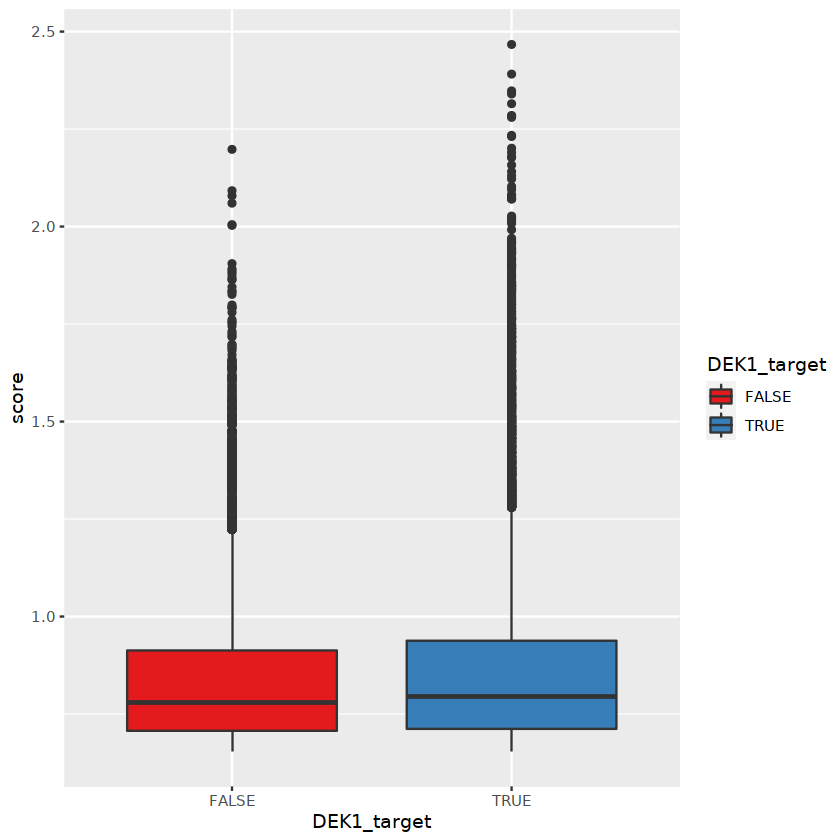

In [89]:
ggplot(DE,aes(y=score,x=DEK1_target,fill=DEK1_target)) + geom_boxplot() + scale_fill_brewer(palette="Set1")

In [90]:
wilcox.test(score~DEK1_target,data=DE)


	Wilcoxon rank sum test with continuity correction

data:  score by DEK1_target
W = 187110000, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [91]:
aggregate(score~DEK1_target,data=DE,FUN = median)

DEK1_target,score
<lgl>,<dbl>
FALSE,0.780
TRUE,0.796


There is a small but significant difference and TFs with deregulated targets have slightly better scoring sites.

Next, CCD scores were clustered into quality bands. 

In [92]:
k=kmeans(log(DE$score),4)

In [93]:
LC=ordered(k$cluster,levels=order(k$centers))
levels(LC)=paste("S",1:4,sep="")
table(LC)
DE=as.data.table(data.frame(DE,SC=as.character(LC)))
setkey(DE,"geneid")

LC
   S1    S2    S3    S4 
17374 13583  8701  3280 

In [94]:
DE$SC=ordered(DE$SC,levels=paste0("S",1:4))
table(DE$SC)


   S1    S2    S3    S4 
17374 13583  8701  3280 

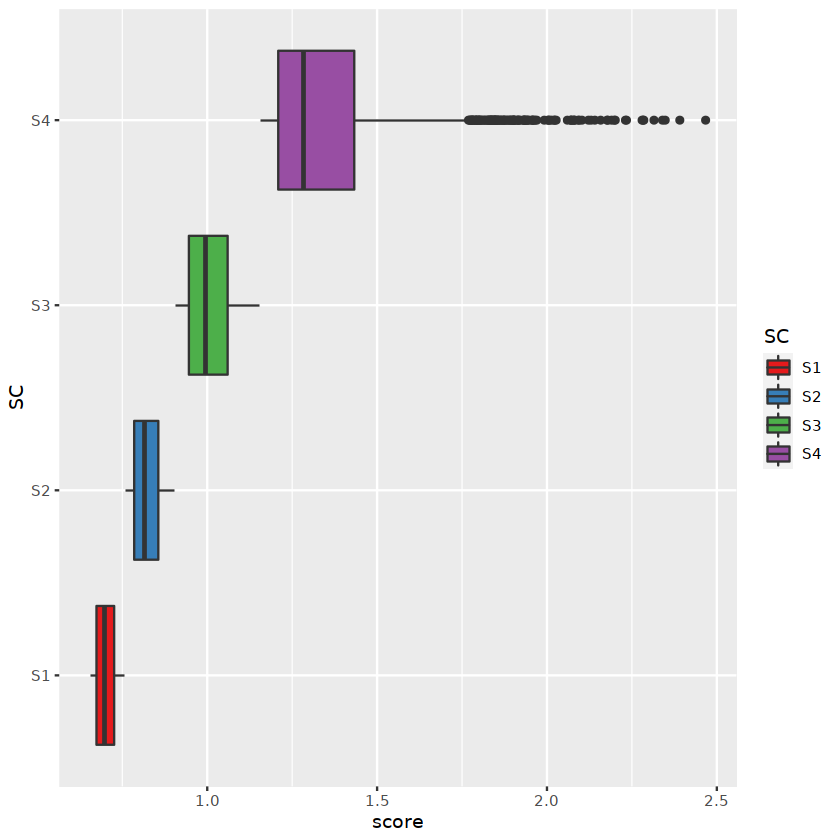

In [95]:
ggplot(DE,aes(y=score,x=SC,fill=SC))+ geom_boxplot() + scale_fill_brewer(palette="Set1") + coord_flip()

In [96]:
table(DE$DEK1_target,DE$SC)
round(prop.table(table(DE$DEK1_target,DE$SC),1)*100)

       
           S1    S2    S3    S4
  FALSE  5754  4184  2628   835
  TRUE  11620  9399  6073  2445

       
        S1 S2 S3 S4
  FALSE 43 31 20  6
  TRUE  39 32 21  8

In [97]:
aggregate(score~SC+DEK1_target,data=DE,median)

SC,DEK1_target,score
<ord>,<lgl>,<dbl>
S1,FALSE,0.698
S2,FALSE,0.812
S3,FALSE,0.995
S4,FALSE,1.272
S1,TRUE,0.698
S2,TRUE,0.818
S3,TRUE,0.995
S4,TRUE,1.285


In [98]:
length(unique(subset(DE,DEK1_target)$geneid))
length(unique(subset(DE,DEK1_target == TRUE & SC > "S1")$geneid))
length(unique(subset(DE,DEK1_target == TRUE & SC > "S2")$geneid))
length(unique(subset(DE,DEK1_target == TRUE & SC > "S3")$geneid))

[1] 531

[1] 531

[1] 528

[1] 476

In [99]:
DE$site=paste0(DE$p1,DE$p2)
head(DE)

geneid,regulator_community,fate_strict_reg,deregulation_reg,significant_reg,phase_reg,n.none,median.none,n.targets,median.targets,⋯,P8,P9,P10,P11,P12,P13,P14,DEK1_target,SC,site
<chr>,<chr>,<chr>,<dbl>,<lgl>,<chr>,<int>,<dbl>,<int>,<dbl>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>,<ord>,<chr>
Pp3c10_10240.mRNA,V,NERD,0.1490026,FALSE,unchanged,177,0.2091448,15,0.2736024,⋯,S,L,T,V,K,G,K,TRUE,S1,*****MASLTVKGK
Pp3c10_10240.mRNA,V,NERD,0.1490026,FALSE,unchanged,177,0.2091448,15,0.2736024,⋯,K,S,S,S,S,N,E,TRUE,S1,ASLTVKGKSSSSNE
Pp3c10_10240.mRNA,V,NERD,0.1490026,FALSE,unchanged,177,0.2091448,15,0.2736024,⋯,E,N,M,Q,Q,R,S,TRUE,S1,GKSSSSNENMQQRS
Pp3c10_10240.mRNA,V,NERD,0.1490026,FALSE,unchanged,177,0.2091448,15,0.2736024,⋯,N,M,Q,Q,R,S,S,TRUE,S3,KSSSSNENMQQRSS
Pp3c10_10240.mRNA,V,NERD,0.1490026,FALSE,unchanged,177,0.2091448,15,0.2736024,⋯,M,Q,Q,R,S,S,A,TRUE,S2,SSSSNENMQQRSSA
Pp3c10_10240.mRNA,V,NERD,0.1490026,FALSE,unchanged,177,0.2091448,15,0.2736024,⋯,Q,Q,R,S,S,A,C,TRUE,S2,SSSNENMQQRSSAC


In [100]:
p=read.fasta(gzfile("../../../calpain_cleavage_prediction/cosmoss_V3.3.release.pep.fasta.gz"))

In [101]:
length(p)
p=p[unique(D$cgi)]
length(p)

[1] 89467

[1] 32445

In [102]:
aa=grep("x",tolower(levels(DE$P10)),invert = TRUE,value = TRUE)
AA=toupper(aa)

In [103]:
P=count(unlist(p),wordsize = 1,freq=TRUE,start=1,by=1,alphabet=aa)

Make background distribution of aa frequencies from Physco proteins.

In [104]:
PP=as.numeric(P)
names(PP)=unlist(lapply(names(P),toupper))
sum(PP)
bg=do.call(cbind,lapply(1:14,function(i) PP))
head(bg)

[1] 1

A,0.07860610,0.07860610,0.07860610,0.07860610,0.07860610,0.07860610,0.07860610,0.07860610,0.07860610,0.07860610,0.07860610,0.07860610,0.07860610,0.07860610
C,0.01713956,0.01713956,0.01713956,0.01713956,0.01713956,0.01713956,0.01713956,0.01713956,0.01713956,0.01713956,0.01713956,0.01713956,0.01713956,0.01713956
D,0.05141047,0.05141047,0.05141047,0.05141047,0.05141047,0.05141047,0.05141047,0.05141047,0.05141047,0.05141047,0.05141047,0.05141047,0.05141047,0.05141047
E,0.06537463,0.06537463,0.06537463,0.06537463,0.06537463,0.06537463,0.06537463,0.06537463,0.06537463,0.06537463,0.06537463,0.06537463,0.06537463,0.06537463
F,0.03750210,0.03750210,0.03750210,0.03750210,0.03750210,0.03750210,0.03750210,0.03750210,0.03750210,0.03750210,0.03750210,0.03750210,0.03750210,0.03750210
G,0.06949478,0.06949478,0.06949478,0.06949478,0.06949478,0.06949478,0.06949478,0.06949478,0.06949478,0.06949478,0.06949478,0.06949478,0.06949478,0.06949478


Looking at cleavage sites of DEK1 targets with score quality > S2

In [105]:
DEK1=subset(DE,DEK1_target == TRUE & SC> "S2")
DEK1=DEK1[grep("\\*",DEK1$site,invert = TRUE),]
DEK1=DEK1[grep("X",DEK1$site,invert = TRUE),]
nrow(DEK1)

[1] 8343

using a background with equal probability for all symbols
frame width not provided, taken to be 1
frame width not provided, taken to be 1


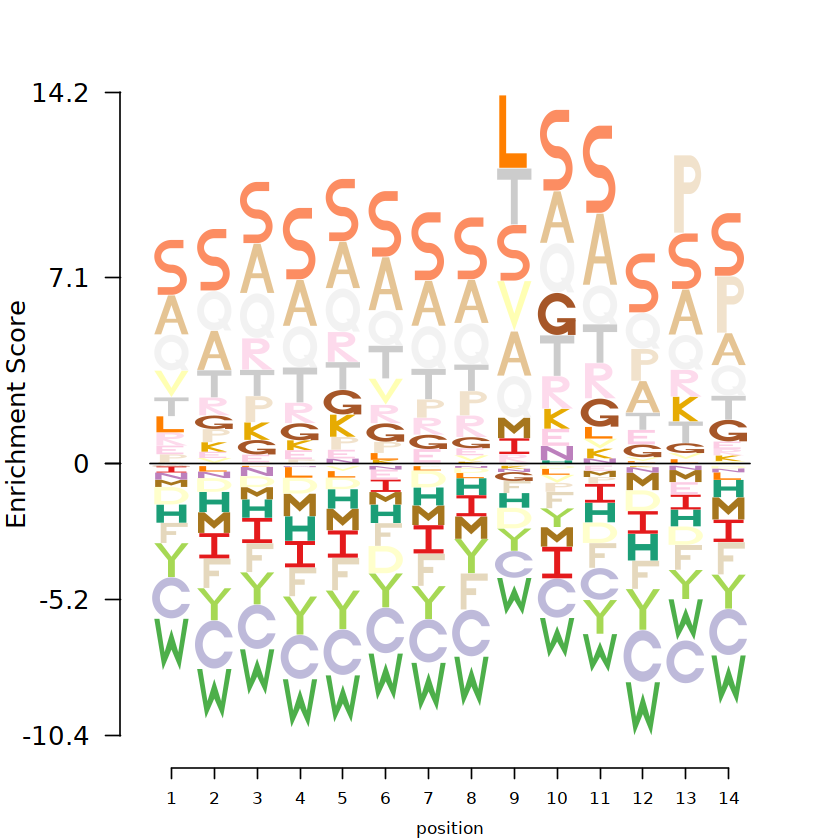

In [106]:
#uniform background model
logomaker(DEK1$site, type = "EDLogo",color_type = "per_symbol",color_seed=27042012)

In [107]:
countf=function(i) {
    q=unlist(lapply(as.character(as.data.frame(DEK1)[,names(DEK1)[31+i]]),tolower))
    q=count(q,wordsize = 1,freq=TRUE,start=1,by=1,alphabet=aa)
    q=as.numeric(q)
    names(q)=AA
    q
}
sites=do.call(cbind,lapply(1:14, countf))
head(sites)

A,0.120714457,0.119515704,0.142411892,0.131982738,0.133061616,0.159434188,0.130783985,0.128746104,0.092064253,0.1196355790,0.201150803,0.101414529,0.1102853033,0.088827619
C,0.004795013,0.002037881,0.001918005,0.002277631,0.001678255,0.001558379,0.002757133,0.002037881,0.004795013,0.0009590026,0.002877008,0.001558379,0.0009590026,0.001798130
D,0.018340925,0.020978183,0.019779429,0.016662671,0.019779429,0.009230400,0.016303045,0.027451450,0.007552146,0.0194198034,0.007552146,0.017142172,0.0115080316,0.029009830
E,0.047470631,0.043155119,0.039558859,0.042315991,0.041596739,0.020858307,0.050227763,0.042076241,0.021457684,0.0408774874,0.016782546,0.060297291,0.0153440422,0.040877487
F,0.016303045,0.010189403,0.008271398,0.008750899,0.006832894,0.011747782,0.007312395,0.006113642,0.012227284,0.0105490290,0.005634140,0.012107408,0.0080316471,0.007312395
G,0.034524095,0.054663150,0.049388636,0.054783026,0.069048190,0.056341405,0.051306641,0.048070007,0.014145289,0.0903859986,0.055861904,0.057060657,0.0363222249,0.064852553


frame width not provided, taken to be 1
frame width not provided, taken to be 1


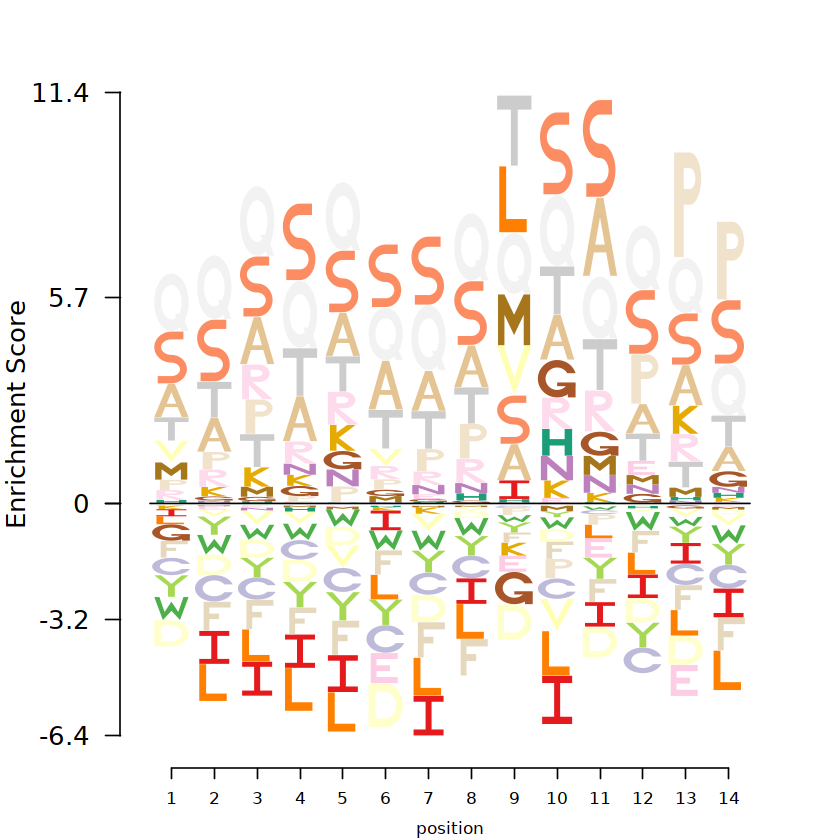

In [108]:
#background derived from the proteome i.e. overall aa frequencies of the respective Physcomitrella proteins
logomaker(sites,bg=bg, type = "EDLogo", color_type = "per_symbol",color_seed=27042012)

The top scoring predicted cleavage sites (score categories S2 and S4) of the 387 candidate PpDEK1 target TFs display an enrichment profile that is highly similar to those obtained from experimentally determined human calpaine cleavage sites:

<img src="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4824854/bin/zjw0041652820002.jpg"
     alt="doi:10.1074/mcp.M115.053413 Figure 2" title="doi:10.1074/mcp.M115.053413 Figure 2"/>

Among other conclusions their study  *"revealed the importance of the P2, P3′, and P4′ sites, and P1-P2 cooperativity"* (i.e. either P1 or P2 is important for specificity).

In the above coordinate system (our data), the cut occurs between positions 10 (P1) and 11 (P1'). We observe a high consistency of enriched amino acids in sites P2 (9), P3' (13) and P4' (14). 

In [109]:
data(aaindex)

In [110]:
aaindex$KYTJ820101

$H
[1] "KYTJ820101"

$D
[1] "Hydropathy index (Kyte-Doolittle, 1982)"

$R
[1] "LIT:0807099 PMID:7108955"

$A
[1] "Kyte, J. and Doolittle, R.F."

$T
[1] "A simple method for displaying the hydropathic character of a protein"

$J
[1] "J. Mol. Biol. 157, 105-132 (1982)"

$C
[1] "JURD980101    0.996  CHOC760103    0.964  OLSK800101    0.942JANJ780102    0.922  NADH010102    0.920  NADH010101    0.918DESM900102    0.898  EISD860103    0.897  CHOC760104    0.889NADH010103    0.885  WOLR810101    0.885  RADA880101    0.884MANP780101    0.881  EISD840101    0.878  PONP800103    0.870WOLR790101    0.869  NAKH920108    0.868  JANJ790101    0.867JANJ790102    0.866  BASU050103    0.863  PONP800102    0.861MEIH800103    0.856  NADH010104    0.856  PONP800101    0.851PONP800108    0.850  CORJ870101    0.848  WARP780101    0.845COWR900101    0.845  PONP930101    0.844  RADA880108    0.842ROSG850102    0.841  DESM900101    0.837  BLAS910101    0.836BIOV880101    0.829  RADA880107    0.828  BASU050101    0.826KANM800104    0.824  LIFS790102    0.824  CIDH920104    0.824MIYS850101    0.821  RADA880104    0.819  NAKH900111    0.817CORJ870104    0.812  NISK800101    0.812  FAUJ830101    0.811ROSM880105    0.806  ARGP820103    0.806  CORJ870103    0.806NADH010105    0.804  NAKH920105    0.803  ARGP820102    0.803CORJ870107    0.801  MIYS990104   -0.800  CORJ870108   -0.802KRIW790101   -0.805  MIYS990105   -0.818  MIYS990103   -0.833CHOC760102   -0.838  MIYS990101   -0.840  MIYS990102   -0.840MONM990101   -0.842  GUYH850101   -0.843  FASG890101   -0.844RACS770102   -0.844  ROSM880101   -0.845  JANJ780103   -0.845ENGD860101   -0.850  PRAM900101   -0.850  JANJ780101   -0.852GRAR740102   -0.859  PUNT030102   -0.862  GUYH850104   -0.869MEIH800102   -0.871  PUNT030101   -0.872  ROSM880102   -0.878KUHL950101   -0.883  GUYH850105   -0.883  OOBM770101   -0.899"

$I
 Ala  Arg  Asn  Asp  Cys  Gln  Glu  Gly  His  Ile  Leu  Lys  Met  Phe  Pro  Ser 
 1.8 -4.5 -3.5 -3.5  2.5 -3.5 -3.5 -0.4 -3.2  4.5  3.8 -3.9  1.9  2.8 -1.6 -0.8 
 Thr  Trp  Tyr  Val 
-0.7 -0.9 -1.3  4.2

In [111]:
aaindex$KYTJ820101$I[aaa(s2c("SQATRP"))]

Ser  Gln  Ala  Thr  Arg  Pro 
-0.8 -3.5  1.8 -0.7 -4.5 -1.6

In [112]:
aaindex$CHOC760104$D
aaindex$CHOC760104$I[aaa(s2c("SQATRP"))]

[1] "Proportion of residues 100% buried (Chothia, 1976)"

Ser  Gln  Ala  Thr  Arg  Pro 
0.08 0.01 0.20 0.08 0.00 0.04

In [113]:
aaindex$FUKS010104$D
range(aaindex$FUKS010104$I)
aaindex$FUKS010104$I[aaa(s2c("SQATRP"))]

[1] "Surface composition of amino acids in nuclear proteins (percent) (Fukuchi-Nishikawa, 2001)"

[1]  0.56 12.68

Ser  Gln  Ala  Thr  Arg  Pro 
6.99 6.00 5.22 5.16 7.30 5.70

In [114]:
aaindex$ZHOH040103$D
range(aaindex$ZHOH040103$I)
aaindex$ZHOH040103$I[aaa(s2c("SQATRP"))]

[1] "Buriability (Zhou-Zhou, 2004)"

[1]  6.1 24.5

Ser  Gln  Ala  Thr  Arg  Pro 
 8.2  8.5 13.4 10.3  8.5  9.9

### Obtain sets for enrichment analysis 

In [116]:
path="../../../ontology_enrichment/input/final_DEK1_targets_sets"
q=subset(e,calpain_reg_type=="none")
qq=subset(e,!calpain_reg_type=="none")
x=unique(union(as.character(q$regulatoryGene),as.character(q$targetGene)))
y=unique(union(as.character(qq$regulatoryGene),as.character(qq$targetGene)))
X=setdiff(x,y)
write.table(X,file=paste(path,"background.set",sep="/"),sep="\t",quote=FALSE,col.names=FALSE,row.names=FALSE)
write.table(y,file=paste(path,"targets.set",sep="/"),sep="\t",quote=FALSE,col.names=FALSE,row.names=FALSE)

In [117]:
eq=droplevels(subset(e,!calpain_reg_type=="none"))
#as.matrix(table(paste(eq$regulator_community,eq$target_community),eq$calpain_reg_type),ncol=2)
rc=expand.grid(TF=unique(eq$regulator_community),target=unique(eq$target_community))
rc=do.call(rbind.data.frame,lapply(seq_len(nrow(rc)),function(i){
    q=subset(eq,regulator_community==rc[i,"TF"] & target_community==rc[i,"target"])
    qq=subset(eq, ! (regulator_community==rc[i,"TF"] & target_community==rc[i,"target"]))
    x=t(as.matrix(table(q$calpain_reg_type)))
    colnames(x)=paste("this",colnames(x),sep=".")
    y=t(as.matrix(table(qq$calpain_reg_type)))
    colnames(y)=paste("other",colnames(y),sep=".")
    m=rbind(x,y)
    row.names(m)=c(paste(rc[i,1],rc[i,2]),"rest")
    f=fisher.test(m)
    data.frame(rc[i,],
               x,
               this.ratio=x[1,1]/x[1,2], 
               y,
               other.ratio=y[1,1]/y[1,2],
               p.value=f$p.value)
}))
rc$fdr=p.adjust(rc$p.value,method="fdr")
head(rc)

,TF,target,this.activator,this.repressor,this.ratio,other.activator,other.repressor,other.ratio,p.value,fdr
,<fct>,<fct>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,V,VIII,38,16,2.3750000,6865,3201,2.144642,0.88359080,1.00000000
2,XI,VIII,28,25,1.1200000,6875,3192,2.153822,0.02533317,0.06966622
3,II,VIII,58,24,2.4166667,6845,3193,2.143752,0.72111751,0.85532446
4,III,VIII,13,15,0.8666667,6890,3202,2.151780,0.02307873,0.06494246
5,I,VIII,20,21,0.9523810,6883,3196,2.153630,0.01085294,0.03367193
6,VIII,VIII,507,190,2.6684211,6396,3027,2.112983,0.00788382,0.02578222


In [118]:
fdr.cutoff=0.01

In [119]:
rc$fdri=cut(rc$fdr,breaks=c(0,1e-100,1e-10,1e-3,1e-1,0.5,1))
table(rc$fdri)


    (0,1e-100] (1e-100,1e-10]  (1e-10,0.001]    (0.001,0.1]      (0.1,0.5] 
             1              8             12             25             31 
       (0.5,1] 
            44 

In [120]:
print("activators")
activation=subset(rc,fdr<fdr.cutoff & this.ratio>other.ratio)
activation$direction="activator"
activation$weight=activation$this.ratio
activation

[1] "activators"


,TF,target,this.activator,this.repressor,this.ratio,other.activator,other.repressor,other.ratio,p.value,fdr,fdri,direction,weight
,<fct>,<fct>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<dbl>
23,V,V,333,51,6.529412,6570,3166,2.075174,1.695287e-17,3.418829e-16,"(1e-100,1e-10]",activator,6.529412
67,V,II,53,7,7.571429,6850,3210,2.133956,4.212997e-04,2.124053e-03,"(0.001,0.1]",activator,7.571429
69,II,II,710,93,7.634409,6193,3124,1.982394,1.038642e-43,6.283784e-42,"(1e-100,1e-10]",activator,7.634409
75,X,II,124,7,17.714286,6779,3210,2.111838,1.608659e-13,2.162753e-12,"(1e-100,1e-10]",activator,17.714286
77,VII,II,42,3,14.000000,6861,3214,2.134723,7.923458e-05,4.774311e-04,"(1e-10,0.001]",activator,14.000000
91,II,X,142,8,17.750000,6761,3209,2.106887,1.452894e-15,2.511431e-14,"(1e-100,1e-10]",activator,17.750000
92,III,X,44,6,7.333333,6859,3211,2.136095,1.985332e-03,8.007504e-03,"(0.001,0.1]",activator,7.333333
97,X,X,1198,104,11.519231,5705,3113,1.832637,8.266338e-106,1.000227e-103,"(0,1e-100]",activator,11.519231
119,X,III,20,0,Inf,6883,3217,2.139571,9.761362e-04,4.542788e-03,"(0.001,0.1]",activator,Inf


In [121]:
print("repressors")
repression=subset(rc,fdr<fdr.cutoff & this.ratio<other.ratio)
repression$direction="repressor"
repression$weight=1/repression$this.ratio
repression

[1] "repressors"


,TF,target,this.activator,this.repressor,this.ratio,other.activator,other.repressor,other.ratio,p.value,fdr,fdri,direction,weight
,<fct>,<fct>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<dbl>
7,IV,VIII,7,18,0.3888889,6896,3199,2.155674,4.254947e-05,2.709729e-04,"(1e-10,0.001]",repressor,2.5714286
8,IX,VIII,53,50,1.0600000,6850,3167,2.162930,4.006117e-04,2.107566e-03,"(0.001,0.1]",repressor,0.9433962
16,I,IX,36,145,0.2482759,6867,3072,2.235352,1.642958e-41,6.626598e-40,"(1e-100,1e-10]",repressor,4.0277778
17,VIII,IX,62,67,0.9253731,6841,3150,2.171746,2.195470e-06,1.660324e-05,"(1e-10,0.001]",repressor,1.0806452
18,IV,IX,37,55,0.6727273,6866,3162,2.171410,3.025241e-08,3.327765e-07,"(1e-10,0.001]",repressor,1.4864865
19,IX,IX,1034,582,1.7766323,5869,2635,2.227324,8.285995e-05,4.774311e-04,"(1e-10,0.001]",repressor,0.5628627
26,III,V,12,33,0.3636364,6891,3184,2.164259,1.209125e-08,1.463041e-07,"(1e-10,0.001]",repressor,2.7500000
27,I,V,20,110,0.1818182,6883,3107,2.215320,5.223345e-36,1.580062e-34,"(1e-100,1e-10]",repressor,5.5000000
29,IV,V,9,24,0.3750000,6894,3193,2.159098,1.604557e-06,1.294343e-05,"(1e-10,0.001]",repressor,2.6666667


In [122]:
library(igraph)
library(RColorBrewer)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [123]:
col=read.delim("../../subnetwork_colours.csv",sep=",",stringsAsFactors=FALSE)
col2=as.character(col$colour)
names(col2)=col$network

In [125]:
rci=rbind(activation,repression)
g=graph_from_data_frame(rci, directed = TRUE)

In [126]:
g

IGRAPH dddd958 DNW- 11 30 -- 
+ attr: name (v/c), this.activator (e/n), this.repressor (e/n),
| this.ratio (e/n), other.activator (e/n), other.repressor (e/n),
| other.ratio (e/n), p.value (e/n), fdr (e/n), fdri (e/c), direction
| (e/c), weight (e/n)
+ edges from dddd958 (vertex names):
 [1] V   ->V    V   ->II   II  ->II   X   ->II   VII ->II   II  ->X   
 [7] III ->X    X   ->X    X   ->III  IV  ->VIII IX  ->VIII I   ->IX  
[13] VIII->IX   IV  ->IX   IX  ->IX   III ->V    I   ->V    IV  ->V   
[19] X   ->V    VI  ->V    XI  ->I    I   ->I    VIII->I    X   ->I   
[25] VI  ->I    I   ->II   IV  ->II   IV  ->IV   XI  ->VII  IV  ->VII 

In [127]:
#cols = rev(brewer.pal(3, "Blues"))
#blues = colorRampPalette(cols)
#cols = rev(brewer.pal(3, "Reds"))
#reds = colorRampPalette(cols)
#colour= c(
#    blues(6)[activation$fdri],
#    reds(6)[repression$fdri]
#    )
#E(g)$color=colour
E(g)$color=c(rep("darkblue",nrow(activation)),rep("red",nrow(repression)))

In [128]:
set.seed(27042012)

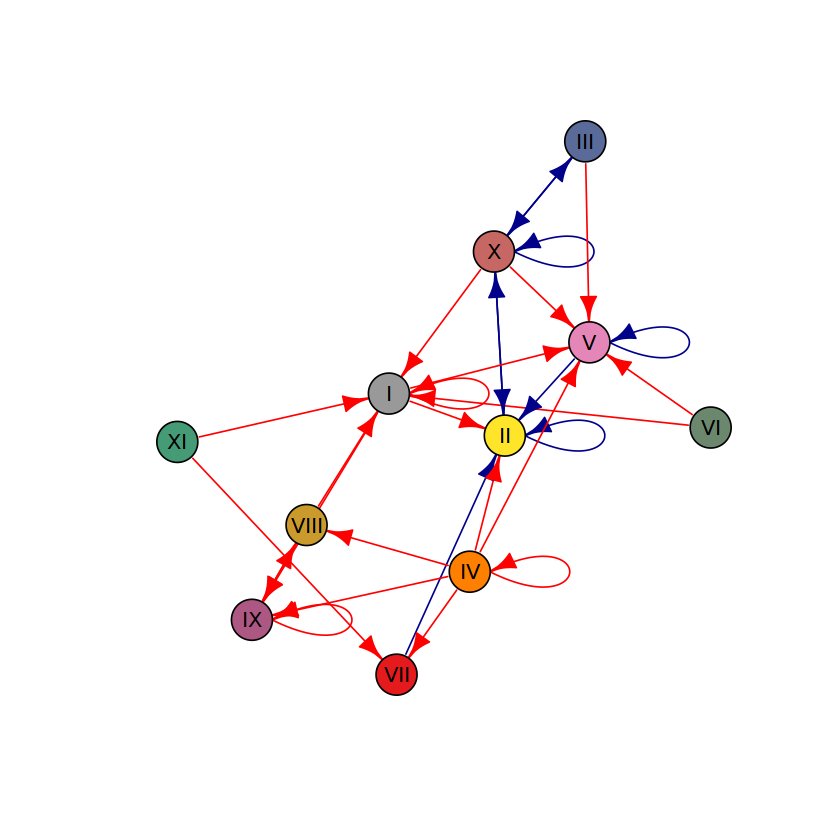

In [135]:
layout=layout.graphopt(g)
plot(g,edge.width=1,edge.arrow.size=1,vertex.color=col2[V(g)$name],vertex.label.color="black",layout=layout)

In [252]:
library(vcd)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ tibble  3.0.1     ✔ purrr   0.3.4
✔ tidyr   1.0.2     ✔ dplyr   0.8.5
✔ readr   1.3.1     ✔ forcats 0.5.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::as_data_frame() masks tibble::as_data_frame(), igraph::as_data_frame()
✖ dplyr::between()       masks data.table::between()
✖ purrr::compose()       masks igraph::compose()
✖ dplyr::count()         masks seqinr::count()
✖ tidyr::crossing()      masks igraph::crossing()
✖ dplyr::filter()        masks stats::filter()
✖ dplyr::first()         masks data.table::first()
✖ dplyr::groups()        masks igraph::groups()
✖ dplyr::lag()           masks stats::lag()
✖ dplyr::last()          masks data.table::last()
✖ purrr::simplify()      masks igraph::simplify()
✖ purrr::transpose()     masks data.table::transpose()


In [250]:
names(eq)

[1] "regulatoryGene"              "targetGene"                 
 [3] "full_cor"                    "full_reg"                   
 [5] "our_cor"                     "our_reg"                    
 [7] "weight"                      "regulator_rank"             
 [9] "target_rank"                 "mutual_rank"                
[11] "regulator_community"         "target_community"           
[13] "community"                   "deregulation_tar"           
[15] "significant_tar"             "is_regulator_tar"           
[17] "is_TF_tar"                   "uncertainty_tar"            
[19] "U1_tar"                      "secondary_ATE_raw_tar"      
[21] "secondary_peptidase_raw_tar" "fate_strict_tar"            
[23] "profile_tar"                 "phase_tar"                  
[25] "deregulation_reg"            "significant_reg"            
[27] "is_regulator_reg"            "is_TF_reg"                  
[29] "uncertainty_reg"             "U1_reg"                     
[31] "secondary_ATE_raw_reg"       "secondary_peptidase_raw_reg"
[33] "fate_strict_reg"             "profile_reg"                
[35] "phase_reg"                   "put_DEK1_target"            
[37] "calpain_reg_type"

In [301]:
tc= c("II","V","X","IX","VIII")
EQ=tibble(eq) %>% group_by(targetGene) %>% slice(which.min(target_rank)) %>% ungroup() %>% filter(target_community %in% tc)
EQ=droplevels.data.frame(as.data.frame(EQ))
EQ=eq

png 
  2

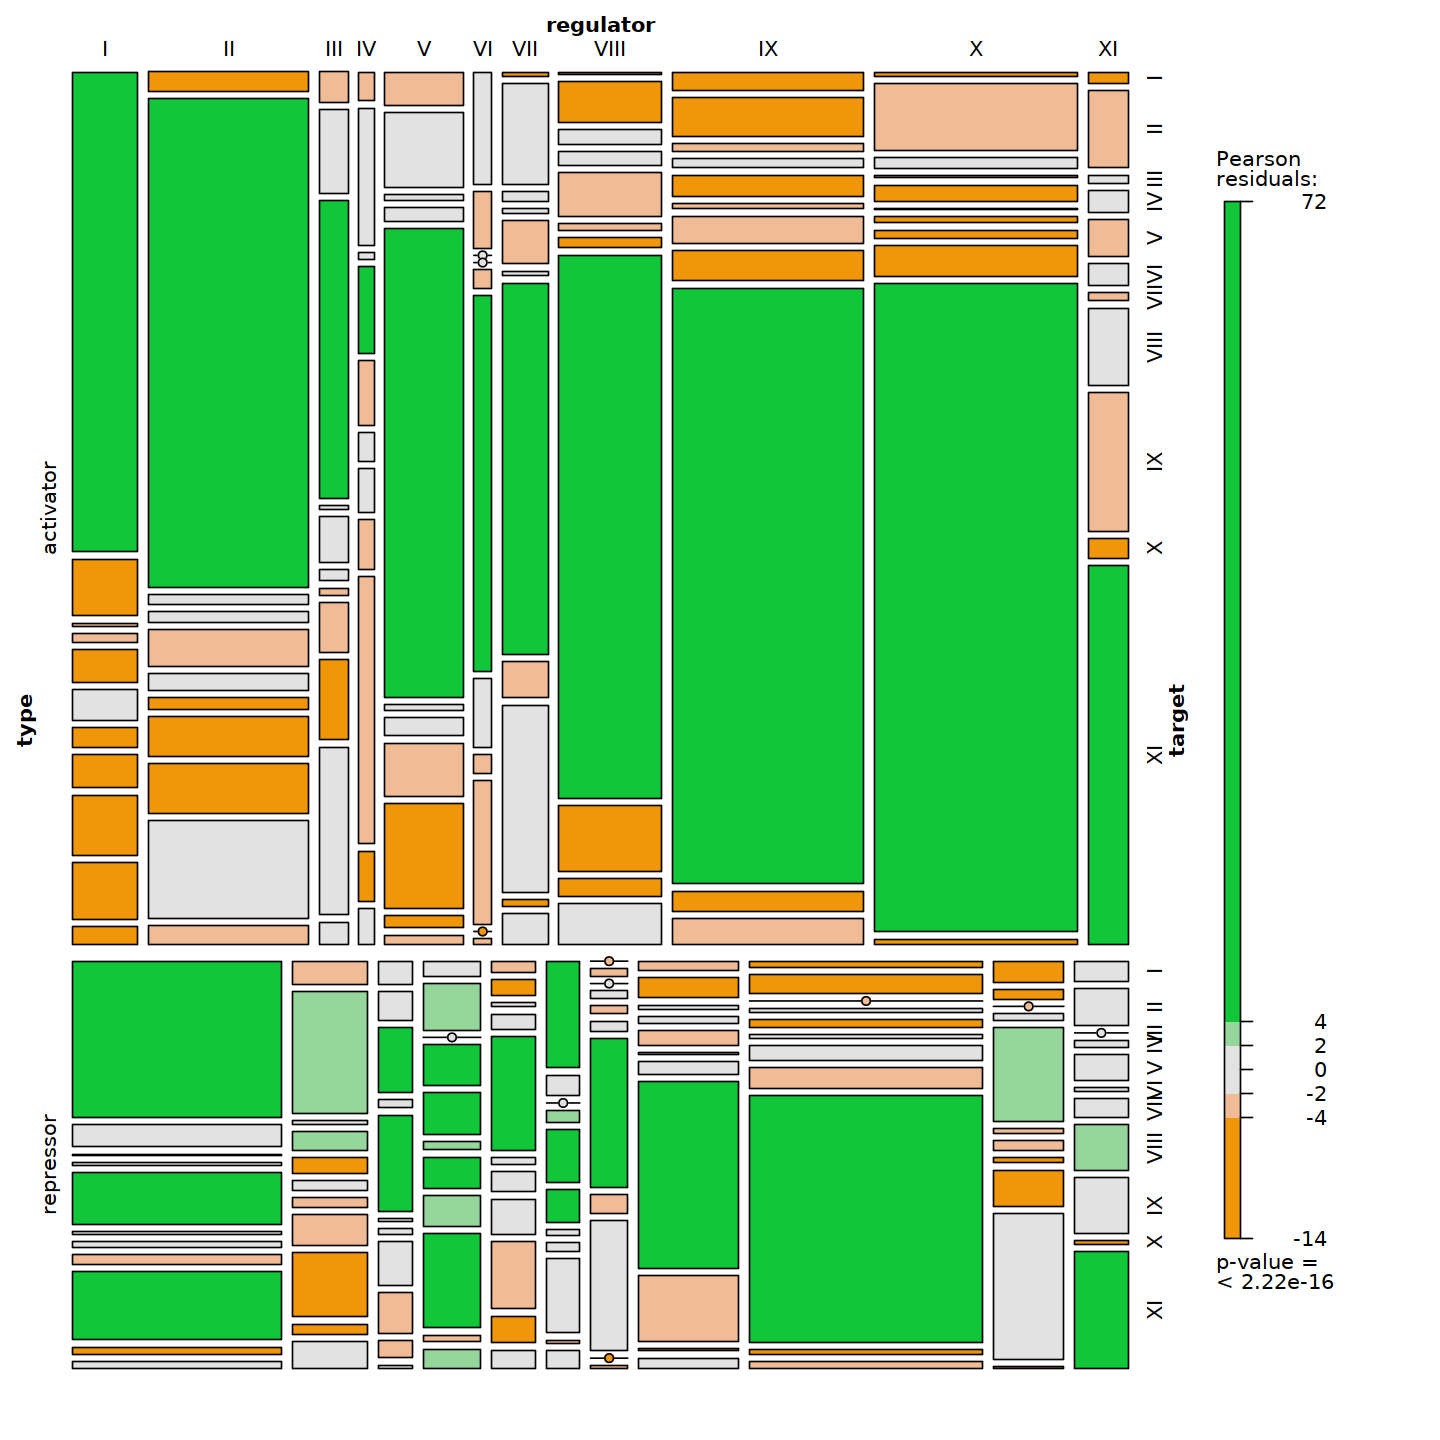

In [317]:
options(repr.plot.width=12, repr.plot.height=12)
x=table(regulator=EQ$regulator_community,target=EQ$target_community,type=EQ$calpain_reg_type)
X=as.data.frame(x)
X=transform(X,regulator=factor(as.character(X$regulator),levels=as.character(as.roman(1:11))),
            target=factor(as.character(X$target),levels=as.character(as.roman(1:11))))
XX=xtabs(Freq~type+regulator+target,data=X)
mosaic(XX, shade=TRUE, clegend=TRUE,legend_width=10,gp =shading_hcl, gp_args = list(h = c(130, 43), c = 100, l = c(90, 70))) 
pdf("mosaic_plot.DEK1_targets.target_networks.pdf",width=10,height=10)
mosaic(XX, shade=TRUE, clegend=TRUE,legend_width=10,gp =shading_hcl, gp_args = list(h = c(130, 43), c = 100, l = c(90, 70))) 
dev.off()

In [319]:
minmax=function(x) (x-min(x))/(max(x)-min(x))

Warning message in chisq.test(QX):
“Chi-squared approximation may be incorrect”

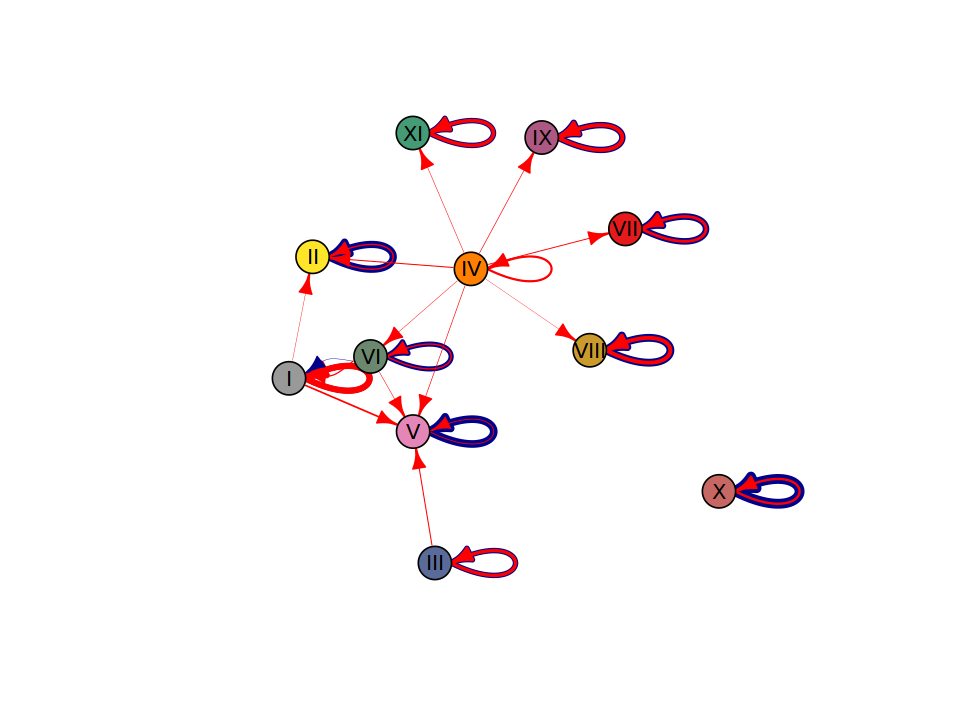

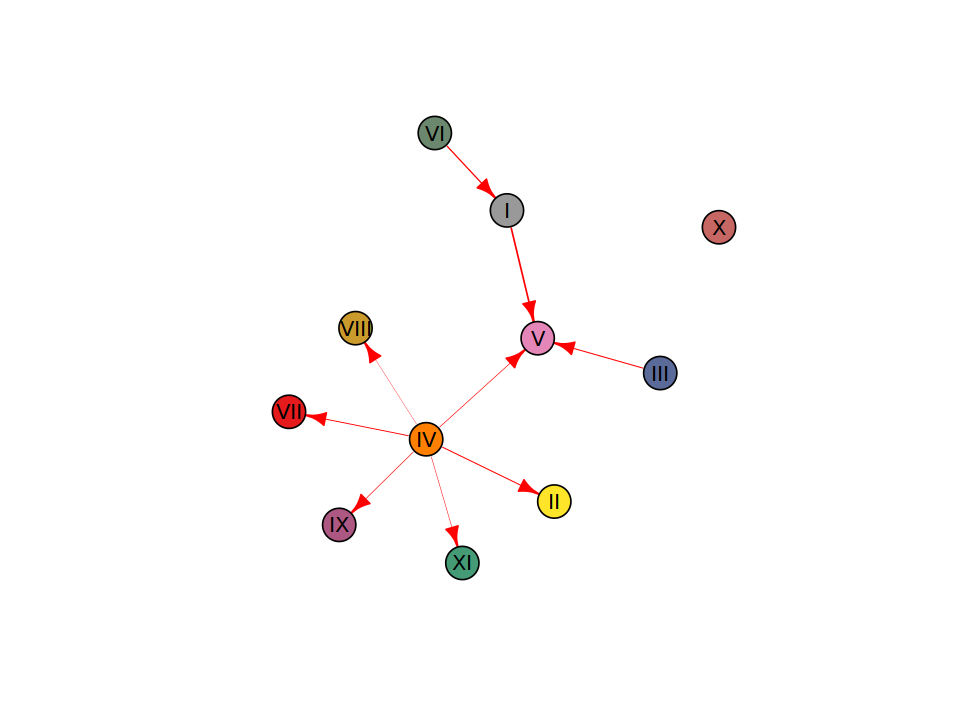

In [323]:
options(repr.plot.width=8, repr.plot.height=6)

QX=table(EQ$regulator_community,paste(EQ$target_community,EQ$calpain_reg_type))
Q=residuals(chisq.test(QX),type="pearson")

Q=data.frame(regulator=rownames(Q)[row(Q)], n=colnames(Q)[col(Q)], weight=c(Q),stringsAsFactors=FALSE)
Q=data.frame(Q,do.call(rbind,strsplit(as.character(Q$n)," ")))
Q=Q[,-2]
Q=Q[,c(1,3,4,2)]
names(Q)=c("regulator","target","directionality","weight2")
#Q=subset(Q,regulator!=target)
Q=subset(Q,weight2>2)
Q$weight=1-minmax(Q$weight2)
set.seed(27042012)

Gd=graph_from_data_frame(Q,directed = TRUE)
#Gd=mst(Gd)
E(Gd)$color=ifelse(E(Gd)$directionality=="activator","darkblue","red")

plot.igraph(Gd,vertex.label=V(Gd)$name,layout=layout_nicely, vertex.label.color="black",
             vertex.color=col2[V(Gd)$name],edge.arrow.size=1,edge.width=E(Gd)$weight2/10
            )
GdM=mst(Gd)
plot.igraph(GdM,vertex.label=V(GdM)$name,layout=layout_nicely, vertex.label.color="black",
             vertex.color=col2[V(GdM)$name],edge.arrow.size=1,edge.width=E(GdM)$weight2/10
            )

In [324]:
path="../../../ontology_enrichment/input/final_DEK1_targets_direction_sets"
for (i in seq_len(nrow(rci))) {
    q=subset(e,calpain_reg_type==as.character(rci[i,"direction"]) & regulator_community == as.character(rci[i,"TF"]) & target_community==as.character(rci[i,"target"]) )
    X=unique(union(as.character(q$regulatoryGene),as.character(q$targetGene)))
    print(paste(rci[i,1],rci[i,2],length(X)))
    write.table(X,file=paste(path,paste(paste(rci[i,"direction"],rci[i,"TF"],"vs",rci[i,"target"],sep="_"),"set",sep="."),sep="/"),sep="\t",quote=FALSE,col.names=FALSE,row.names=FALSE)
} 

[1] "V V 206"
[1] "V II 59"
[1] "II II 335"
[1] "X II 104"
[1] "VII II 49"
[1] "II X 127"
[1] "III X 53"
[1] "X X 292"
[1] "X III 26"
[1] "IV VIII 25"
[1] "IX VIII 65"
[1] "I IX 149"
[1] "VIII IX 80"
[1] "IV IX 67"
[1] "IX IX 361"
[1] "III V 35"
[1] "I V 109"
[1] "IV V 32"
[1] "X V 59"
[1] "VI V 22"
[1] "XI I 19"
[1] "I I 160"
[1] "VIII I 17"
[1] "X I 21"
[1] "VI I 29"
[1] "I II 59"
[1] "IV II 39"
[1] "IV IV 23"
[1] "XI VII 16"
[1] "IV VII 24"


In [325]:
q=merge(eq,rc,by.x=c("regulator_community","target_community"),by.y=c("TF","target"))
names(q)=gsub("\\.","_",names(q))
names(q)=tolower(names(q))
nrow(q)
head(q)

[1] 10120

regulator_community,target_community,regulatorygene,targetgene,full_cor,full_reg,our_cor,our_reg,weight,regulator_rank,⋯,calpain_reg_type,this_activator,this_repressor,this_ratio,other_activator,other_repressor,other_ratio,p_value,fdr,fdri
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<int>,⋯,<fct>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>
I,I,Pp3c10_20000.mRNA,Pp3c11_10300.mRNA,0.5584107,+,0.32343497,+,0.009620540,151,⋯,activator,287,331,0.8670695,6616,2886,2.292446,8.609435e-31,2.083483e-29,"(1e-100,1e-10]"
I,I,Pp3c10_20000.mRNA,Pp3c16_5590.mRNA,0.4463260,+,0.08995787,+,0.013258773,54,⋯,activator,287,331,0.8670695,6616,2886,2.292446,8.609435e-31,2.083483e-29,"(1e-100,1e-10]"
I,I,Pp3c10_20000.mRNA,Pp3c26_3400.mRNA,-0.5953205,-,-0.25903237,-,0.011553821,88,⋯,repressor,287,331,0.8670695,6616,2886,2.292446,8.609435e-31,2.083483e-29,"(1e-100,1e-10]"
I,I,Pp3c10_20000.mRNA,Pp3c3_32670.mRNA,0.6375019,+,0.07970669,+,0.013046741,61,⋯,activator,287,331,0.8670695,6616,2886,2.292446,8.609435e-31,2.083483e-29,"(1e-100,1e-10]"
I,I,Pp3c10_20000.mRNA,Pp3c4_20210.mRNA,-0.6135003,-,-0.42892618,-,0.008524547,228,⋯,repressor,287,331,0.8670695,6616,2886,2.292446,8.609435e-31,2.083483e-29,"(1e-100,1e-10]"
I,I,Pp3c10_20000.mRNA,Pp3c6_14770.mRNA,-0.4682243,-,0.21260728,+,0.007622905,299,⋯,repressor,287,331,0.8670695,6616,2886,2.292446,8.609435e-31,2.083483e-29,"(1e-100,1e-10]"


In [326]:
library(RPostgreSQL)


Loading required package: DBI


In [327]:
con = dbConnect(PostgreSQL(),dbname = 'yourdl', 
                 host = 'yourhost',
                 port = 0000)

In [328]:
dbWriteTable(conn =con, q,name=c("physcogrn","final_dek1_targets"),row.names=FALSE)

[1] TRUE

In [330]:
write_delim(q %>% mutate(shared_name=sprintf("%s (regulates) %s",regulatorygene,targetgene)) 
            ,"final_dek1_targets.tsv",delim="\t")